# Title Generation Project

This project aims to generate course titles based on a given set of skills using the GPT-2 model. We'll be using the Coursera course dataset available at [Kaggle](https://www.kaggle.com/datasets/azraimohamad/coursera-course-data/data).

#### Course: ***Deep Learning, University of Haifa***

#### Supervision: ***Prof. Rita Osdachiy***

#### Due Date: ***21/4/2024***


## Submitters:
**Name:** Faisal Omari
**ID:** 325616894 

**Name:** Saji Assi
**ID:** 314831207

### Technologies Used:
- Python
- Transformers library (Hugging Face)
- Pandas
- Matplotlib
- Jupyter Notebook


In [1]:
# Imports and Mode Selection

import pandas as pd
import matplotlib.pyplot as plt
from transformers import GPT2Tokenizer, GPT2LMHeadModel, TextDataset, DataCollatorForLanguageModeling, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split

2024-04-21 20:40:05.366783: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Preprocessing Data

In this section, we preprocess the dataset by combining skills and titles and saving the data to a text file for training.


In [2]:
# Load the dataset
df = pd.read_csv('coursera_course_dataset_v2_no_null.csv')

# Preprocessing the data
df['input_text'] = df['Skills'].apply(lambda x: 'Course skills: ' + x)
df['target_text'] = df['Title'].apply(lambda x: 'Course title: ' + x)

# Save the preprocessed data to a new file
training_data = df[['input_text', 'target_text']].values.tolist()
with open('training_data.txt', 'w') as file:
    for input_text, target_text in training_data:
        file.write(input_text + ' \\n ' + target_text + '\n')

# Load the data from the txt file
with open('training_data.txt', 'r') as file:
    lines = file.readlines()

# Split the data into input and target text
data = [line.strip().split('\\n') for line in lines]
input_text = [item[0] for item in data]
target_text = [item[1] for item in data]

# Split the dataset into training, validation, and test sets
train_input, temp_input, train_target, temp_target = train_test_split(input_text, target_text, test_size=0.3, random_state=42)
val_input, test_input, val_target, test_target = train_test_split(temp_input, temp_target, test_size=0.5, random_state=42)

# Save the preprocessed data to new files
with open('train_data.txt', 'w') as file:
    for input_text, target_text in zip(train_input, train_target):
        file.write(input_text + ' \\n ' + target_text + '\n')

with open('val_data.txt', 'w') as file:
    for input_text, target_text in zip(val_input, val_target):
        file.write(input_text + ' \\n ' + target_text + '\n')

with open('test_data.txt', 'w') as file:
    for input_text, target_text in zip(test_input, test_target):
        file.write(input_text + ' \\n ' + target_text + '\n')

## Initializing Tokenizer and Model

Here, we initialize the GPT-2 tokenizer and model for fine-tuning.


In [3]:
# Tokenizer and Model Initialization
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

## Training Dataset Preparation

In this section, we prepare the training dataset using the preprocessed data and define data collators.


In [4]:
# Training Dataset
train_dataset = TextDataset(
    tokenizer=tokenizer,
    file_path='train_data.csv',
    block_size=128
)

# Validation Dataset
val_dataset = TextDataset(
    tokenizer=tokenizer,
    file_path='val_data.csv',
    block_size=128
)

# Test Dataset
test_dataset = TextDataset(
    tokenizer=tokenizer,
    file_path='test_data.csv',
    block_size=128
)

# Data Collator
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=False
)


/home/faisal/anaconda3/lib/python3.10/site-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


## Training Arguments Setup

Here, we define the training arguments such as output directory, batch size, and logging settings.


In [5]:
# Training Arguments
training_args = TrainingArguments(
    output_dir="./gpt2-finetuned",
    overwrite_output_dir=True,
    num_train_epochs=40,
    per_device_train_batch_size=8,
    save_steps=10_000,
    save_total_limit=2,
    logging_dir="./logs",
    logging_steps=100,
    evaluation_strategy="epoch",  # Evaluate after each epoch
    disable_tqdm=False,
)

## Trainer Initialization

In this section, we initialize the Trainer object with the model, training arguments, and dataset.


In [6]:
# Trainer Initialization
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

/home/faisal/anaconda3/lib/python3.10/site-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


## Start Fine-Tuning

Now, we start fine-tuning the GPT-2 model on the training dataset.


In [7]:
# Start fine-tuning
trainer.train()

  0%|          | 0/2240 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

{'eval_loss': 1.5291900634765625, 'eval_runtime': 1.4343, 'eval_samples_per_second': 66.232, 'eval_steps_per_second': 8.366, 'epoch': 1.0}
{'loss': 1.8725, 'grad_norm': 6.057159423828125, 'learning_rate': 4.7767857142857144e-05, 'epoch': 1.79}


  0%|          | 0/12 [00:00<?, ?it/s]

{'eval_loss': 1.3943283557891846, 'eval_runtime': 1.4351, 'eval_samples_per_second': 66.197, 'eval_steps_per_second': 8.362, 'epoch': 2.0}


  0%|          | 0/12 [00:00<?, ?it/s]

{'eval_loss': 1.3471710681915283, 'eval_runtime': 1.4451, 'eval_samples_per_second': 65.738, 'eval_steps_per_second': 8.304, 'epoch': 3.0}
{'loss': 1.2768, 'grad_norm': 4.851877689361572, 'learning_rate': 4.5535714285714286e-05, 'epoch': 3.57}


  0%|          | 0/12 [00:00<?, ?it/s]

{'eval_loss': 1.3177636861801147, 'eval_runtime': 1.4422, 'eval_samples_per_second': 65.873, 'eval_steps_per_second': 8.321, 'epoch': 4.0}


  0%|          | 0/12 [00:00<?, ?it/s]

{'eval_loss': 1.3192346096038818, 'eval_runtime': 1.443, 'eval_samples_per_second': 65.836, 'eval_steps_per_second': 8.316, 'epoch': 5.0}
{'loss': 1.1435, 'grad_norm': 5.570331573486328, 'learning_rate': 4.3303571428571435e-05, 'epoch': 5.36}


  0%|          | 0/12 [00:00<?, ?it/s]

{'eval_loss': 1.3182669878005981, 'eval_runtime': 1.442, 'eval_samples_per_second': 65.88, 'eval_steps_per_second': 8.322, 'epoch': 6.0}


  0%|          | 0/12 [00:00<?, ?it/s]

{'eval_loss': 1.3298348188400269, 'eval_runtime': 1.4375, 'eval_samples_per_second': 66.086, 'eval_steps_per_second': 8.348, 'epoch': 7.0}
{'loss': 1.0379, 'grad_norm': 4.68877649307251, 'learning_rate': 4.107142857142857e-05, 'epoch': 7.14}


  0%|          | 0/12 [00:00<?, ?it/s]

{'eval_loss': 1.3331778049468994, 'eval_runtime': 1.4309, 'eval_samples_per_second': 66.393, 'eval_steps_per_second': 8.387, 'epoch': 8.0}
{'loss': 0.9479, 'grad_norm': 5.1579508781433105, 'learning_rate': 3.883928571428572e-05, 'epoch': 8.93}


  0%|          | 0/12 [00:00<?, ?it/s]

{'eval_loss': 1.356664776802063, 'eval_runtime': 1.435, 'eval_samples_per_second': 66.2, 'eval_steps_per_second': 8.362, 'epoch': 9.0}


  0%|          | 0/12 [00:00<?, ?it/s]

{'eval_loss': 1.3824536800384521, 'eval_runtime': 1.434, 'eval_samples_per_second': 66.25, 'eval_steps_per_second': 8.368, 'epoch': 10.0}
{'loss': 0.8679, 'grad_norm': 5.020711421966553, 'learning_rate': 3.6607142857142853e-05, 'epoch': 10.71}


  0%|          | 0/12 [00:00<?, ?it/s]

{'eval_loss': 1.4080958366394043, 'eval_runtime': 1.4357, 'eval_samples_per_second': 66.169, 'eval_steps_per_second': 8.358, 'epoch': 11.0}


  0%|          | 0/12 [00:00<?, ?it/s]

{'eval_loss': 1.442394733428955, 'eval_runtime': 1.4354, 'eval_samples_per_second': 66.184, 'eval_steps_per_second': 8.36, 'epoch': 12.0}
{'loss': 0.795, 'grad_norm': 4.608510494232178, 'learning_rate': 3.4375e-05, 'epoch': 12.5}


  0%|          | 0/12 [00:00<?, ?it/s]

{'eval_loss': 1.4750014543533325, 'eval_runtime': 1.4367, 'eval_samples_per_second': 66.122, 'eval_steps_per_second': 8.352, 'epoch': 13.0}


  0%|          | 0/12 [00:00<?, ?it/s]

{'eval_loss': 1.5122796297073364, 'eval_runtime': 1.4661, 'eval_samples_per_second': 64.798, 'eval_steps_per_second': 8.185, 'epoch': 14.0}
{'loss': 0.7293, 'grad_norm': 4.297656059265137, 'learning_rate': 3.2142857142857144e-05, 'epoch': 14.29}


  0%|          | 0/12 [00:00<?, ?it/s]

{'eval_loss': 1.519431710243225, 'eval_runtime': 1.4699, 'eval_samples_per_second': 64.629, 'eval_steps_per_second': 8.164, 'epoch': 15.0}


  0%|          | 0/12 [00:00<?, ?it/s]

{'eval_loss': 1.5533989667892456, 'eval_runtime': 1.4799, 'eval_samples_per_second': 64.195, 'eval_steps_per_second': 8.109, 'epoch': 16.0}
{'loss': 0.6762, 'grad_norm': 3.5958874225616455, 'learning_rate': 2.9910714285714286e-05, 'epoch': 16.07}


  0%|          | 0/12 [00:00<?, ?it/s]

{'eval_loss': 1.5913729667663574, 'eval_runtime': 1.4873, 'eval_samples_per_second': 63.876, 'eval_steps_per_second': 8.069, 'epoch': 17.0}
{'loss': 0.6201, 'grad_norm': 3.5066211223602295, 'learning_rate': 2.767857142857143e-05, 'epoch': 17.86}


  0%|          | 0/12 [00:00<?, ?it/s]

{'eval_loss': 1.609941840171814, 'eval_runtime': 1.4734, 'eval_samples_per_second': 64.477, 'eval_steps_per_second': 8.145, 'epoch': 18.0}


  0%|          | 0/12 [00:00<?, ?it/s]

{'eval_loss': 1.656994342803955, 'eval_runtime': 1.4813, 'eval_samples_per_second': 64.131, 'eval_steps_per_second': 8.101, 'epoch': 19.0}
{'loss': 0.569, 'grad_norm': 3.9678869247436523, 'learning_rate': 2.544642857142857e-05, 'epoch': 19.64}


  0%|          | 0/12 [00:00<?, ?it/s]

{'eval_loss': 1.6958396434783936, 'eval_runtime': 1.4493, 'eval_samples_per_second': 65.549, 'eval_steps_per_second': 8.28, 'epoch': 20.0}


  0%|          | 0/12 [00:00<?, ?it/s]

{'eval_loss': 1.7006211280822754, 'eval_runtime': 1.4473, 'eval_samples_per_second': 65.641, 'eval_steps_per_second': 8.292, 'epoch': 21.0}
{'loss': 0.5272, 'grad_norm': 3.4087133407592773, 'learning_rate': 2.3214285714285715e-05, 'epoch': 21.43}


  0%|          | 0/12 [00:00<?, ?it/s]

{'eval_loss': 1.7102571725845337, 'eval_runtime': 1.4459, 'eval_samples_per_second': 65.702, 'eval_steps_per_second': 8.299, 'epoch': 22.0}


  0%|          | 0/12 [00:00<?, ?it/s]

{'eval_loss': 1.7593014240264893, 'eval_runtime': 1.4456, 'eval_samples_per_second': 65.716, 'eval_steps_per_second': 8.301, 'epoch': 23.0}
{'loss': 0.495, 'grad_norm': 3.4274508953094482, 'learning_rate': 2.098214285714286e-05, 'epoch': 23.21}


  0%|          | 0/12 [00:00<?, ?it/s]

{'eval_loss': 1.7790024280548096, 'eval_runtime': 1.4427, 'eval_samples_per_second': 65.848, 'eval_steps_per_second': 8.318, 'epoch': 24.0}
{'loss': 0.4666, 'grad_norm': 3.6999340057373047, 'learning_rate': 1.8750000000000002e-05, 'epoch': 25.0}


  0%|          | 0/12 [00:00<?, ?it/s]

{'eval_loss': 1.8083714246749878, 'eval_runtime': 1.375, 'eval_samples_per_second': 69.092, 'eval_steps_per_second': 8.727, 'epoch': 25.0}


  0%|          | 0/12 [00:00<?, ?it/s]

{'eval_loss': 1.83818519115448, 'eval_runtime': 1.4474, 'eval_samples_per_second': 65.636, 'eval_steps_per_second': 8.291, 'epoch': 26.0}
{'loss': 0.4311, 'grad_norm': 3.092736005783081, 'learning_rate': 1.6517857142857144e-05, 'epoch': 26.79}


  0%|          | 0/12 [00:00<?, ?it/s]

{'eval_loss': 1.845240592956543, 'eval_runtime': 1.4446, 'eval_samples_per_second': 65.764, 'eval_steps_per_second': 8.307, 'epoch': 27.0}


  0%|          | 0/12 [00:00<?, ?it/s]

{'eval_loss': 1.8441976308822632, 'eval_runtime': 1.4475, 'eval_samples_per_second': 65.629, 'eval_steps_per_second': 8.29, 'epoch': 28.0}
{'loss': 0.4126, 'grad_norm': 2.7541558742523193, 'learning_rate': 1.4285714285714285e-05, 'epoch': 28.57}


  0%|          | 0/12 [00:00<?, ?it/s]

{'eval_loss': 1.8772486448287964, 'eval_runtime': 1.4405, 'eval_samples_per_second': 65.95, 'eval_steps_per_second': 8.33, 'epoch': 29.0}


  0%|          | 0/12 [00:00<?, ?it/s]

{'eval_loss': 1.895973801612854, 'eval_runtime': 1.4418, 'eval_samples_per_second': 65.89, 'eval_steps_per_second': 8.323, 'epoch': 30.0}
{'loss': 0.3947, 'grad_norm': 2.890833854675293, 'learning_rate': 1.2053571428571429e-05, 'epoch': 30.36}


  0%|          | 0/12 [00:00<?, ?it/s]

{'eval_loss': 1.9142159223556519, 'eval_runtime': 1.4411, 'eval_samples_per_second': 65.921, 'eval_steps_per_second': 8.327, 'epoch': 31.0}


  0%|          | 0/12 [00:00<?, ?it/s]

{'eval_loss': 1.9313949346542358, 'eval_runtime': 1.4409, 'eval_samples_per_second': 65.933, 'eval_steps_per_second': 8.328, 'epoch': 32.0}
{'loss': 0.3709, 'grad_norm': 2.6281368732452393, 'learning_rate': 9.821428571428573e-06, 'epoch': 32.14}


  0%|          | 0/12 [00:00<?, ?it/s]

{'eval_loss': 1.941980004310608, 'eval_runtime': 1.4412, 'eval_samples_per_second': 65.919, 'eval_steps_per_second': 8.327, 'epoch': 33.0}
{'loss': 0.3611, 'grad_norm': 2.981351137161255, 'learning_rate': 7.589285714285714e-06, 'epoch': 33.93}


  0%|          | 0/12 [00:00<?, ?it/s]

{'eval_loss': 1.9459493160247803, 'eval_runtime': 1.439, 'eval_samples_per_second': 66.02, 'eval_steps_per_second': 8.339, 'epoch': 34.0}


  0%|          | 0/12 [00:00<?, ?it/s]

{'eval_loss': 1.9535638093948364, 'eval_runtime': 1.4354, 'eval_samples_per_second': 66.181, 'eval_steps_per_second': 8.36, 'epoch': 35.0}
{'loss': 0.3463, 'grad_norm': 2.9321961402893066, 'learning_rate': 5.357142857142857e-06, 'epoch': 35.71}


  0%|          | 0/12 [00:00<?, ?it/s]

{'eval_loss': 1.9605286121368408, 'eval_runtime': 1.4397, 'eval_samples_per_second': 65.984, 'eval_steps_per_second': 8.335, 'epoch': 36.0}


  0%|          | 0/12 [00:00<?, ?it/s]

{'eval_loss': 1.966606855392456, 'eval_runtime': 1.4403, 'eval_samples_per_second': 65.957, 'eval_steps_per_second': 8.331, 'epoch': 37.0}
{'loss': 0.3419, 'grad_norm': 2.8166606426239014, 'learning_rate': 3.125e-06, 'epoch': 37.5}


  0%|          | 0/12 [00:00<?, ?it/s]

{'eval_loss': 1.9671273231506348, 'eval_runtime': 1.442, 'eval_samples_per_second': 65.881, 'eval_steps_per_second': 8.322, 'epoch': 38.0}


  0%|          | 0/12 [00:00<?, ?it/s]

{'eval_loss': 1.9682996273040771, 'eval_runtime': 1.4357, 'eval_samples_per_second': 66.169, 'eval_steps_per_second': 8.358, 'epoch': 39.0}
{'loss': 0.3369, 'grad_norm': 2.750410556793213, 'learning_rate': 8.928571428571428e-07, 'epoch': 39.29}


  0%|          | 0/12 [00:00<?, ?it/s]

{'eval_loss': 1.9697946310043335, 'eval_runtime': 1.4482, 'eval_samples_per_second': 65.597, 'eval_steps_per_second': 8.286, 'epoch': 40.0}
{'train_runtime': 1001.0362, 'train_samples_per_second': 17.822, 'train_steps_per_second': 2.238, 'train_loss': 0.6765267257179532, 'epoch': 40.0}


TrainOutput(global_step=2240, training_loss=0.6765267257179532, metrics={'train_runtime': 1001.0362, 'train_samples_per_second': 17.822, 'train_steps_per_second': 2.238, 'train_loss': 0.6765267257179532, 'epoch': 40.0})

## Save Model and Tokenizer

After fine-tuning, we save the fine-tuned model and tokenizer for future use.


In [8]:
# Save the fine-tuned model and tokenizer
model.save_pretrained("./gpt2-finetuned")
tokenizer.save_pretrained("./gpt2-finetuned")

('./gpt2-finetuned/tokenizer_config.json',
 './gpt2-finetuned/special_tokens_map.json',
 './gpt2-finetuned/vocab.json',
 './gpt2-finetuned/merges.txt',
 './gpt2-finetuned/added_tokens.json')

## Plot Training Loss

Here, we plot the training loss to visualize the training progress.


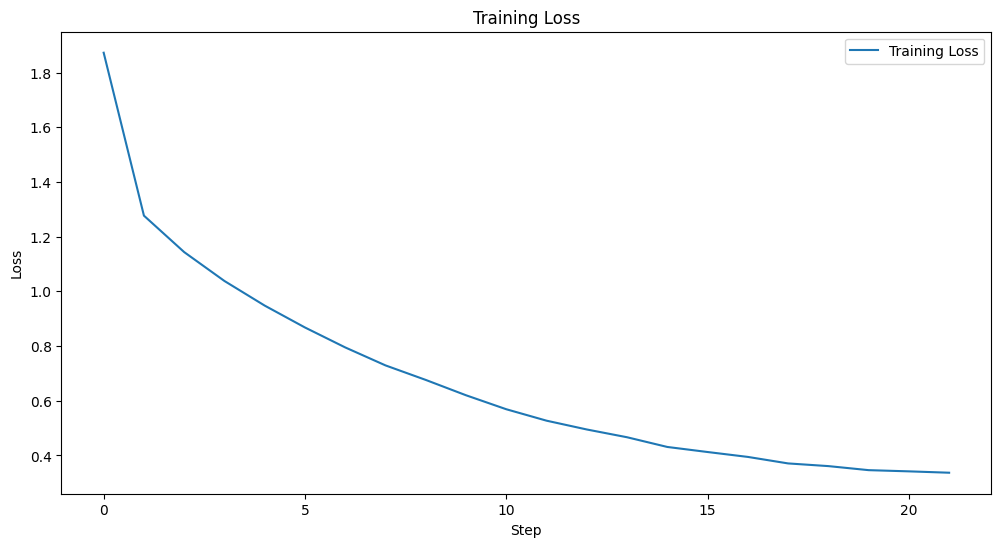

  0%|          | 0/13 [00:00<?, ?it/s]

Evaluation Loss: 0.4382923


In [23]:
# Plot the training loss
train_metrics = trainer.state.log_history
train_loss = [metric['loss'] for metric in train_metrics if 'loss' in metric]

plt.figure(figsize=(12, 6))
plt.plot(range(len(train_loss)), train_loss, label="Training Loss")
plt.xlabel("Step")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()
plt.savefig("training_loss_plot.png")
plt.show()

# Get the evaluation metrics
eval_results = trainer.evaluate(eval_dataset=test_dataset)
eval_loss = eval_results["eval_loss"]

# Print or use the evaluation metrics as needed
print("Evaluation Loss:", eval_loss)

## Data Analysis and Visualization

In this section, we perform data analysis and visualization on the Coursera course dataset.


   Unnamed: 0                                  Title Organization  \
0           0                   Google Cybersecurity       Google   
1           1                  Google Data Analytics       Google   
2           2             Google Project Management:       Google   
3           3                       IBM Data Science          IBM   
4           4  Google Digital Marketing & E-commerce       Google   

                                              Skills  Ratings  \
0   Network Security, Python Programming, Linux, ...      4.8   
1   Data Analysis, R Programming, SQL, Business C...      4.8   
2   Project Management, Strategy and Operations, ...      4.8   
3   Python Programming, Data Science, Machine Lea...      4.6   
4   Digital Marketing, Marketing, Marketing Manag...      4.8   

       Review counts                                           Metadata  \
0   4.8(20K reviews)  Beginner · Professional Certificate · 3 - 6 Mo...   
1  4.8(137K reviews)  Beginner · Professiona

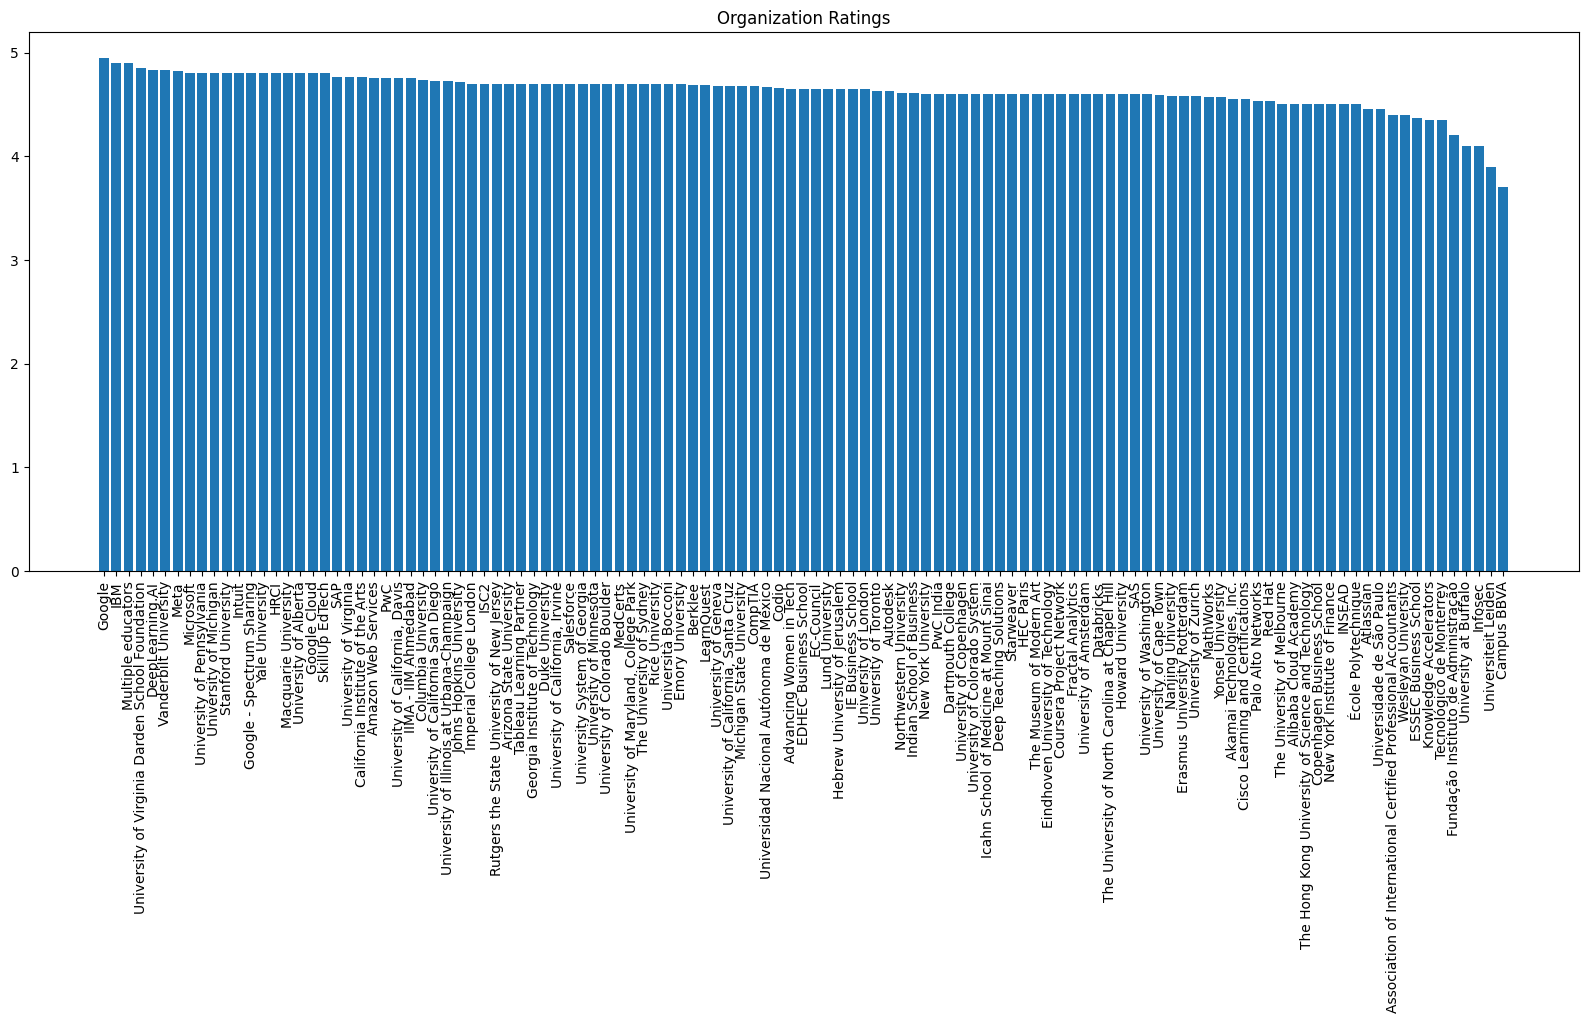

In [10]:
# Data Analysis
print(df.head())
print(df.describe())
print(df.info())

organization = df['Organization'].unique()
organization_ratings = df.groupby('Organization')['Ratings'].mean()

plt.figure(figsize=(20, 7))
plt.title('Organization Ratings')
plt.bar(organization, organization_ratings.sort_values(ascending=False))
plt.xticks(rotation='vertical')
plt.show()

## Course Title Generation

In this section, we demonstrate how to generate course titles using the fine-tuned GPT-2 model.


In [20]:
# Load the fine-tuned model and tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("./gpt2-finetuned")
model = GPT2LMHeadModel.from_pretrained("./gpt2-finetuned")

# Function to generate course titles
def generate_course_title(skills, model, tokenizer):
    input_text = f"Course skills: {skills}"
    # Encode the input text 
    input_ids = tokenizer.encode(input_text, return_tensors='pt')
    
    # Generate a sequence of tokens from the input
    output = model.generate(input_ids, max_length=200, num_return_sequences=1, no_repeat_ngram_size=2)
    
    # Decode the generated sequence to a readable text
    generated_title = tokenizer.decode(output[0], skip_special_tokens=True)
    
    # Split the generated text based on the delimiter
    # print(generated_title)
    titles = generated_title.split('\n')
    titles = titles[0].split(':')
    title = titles[2][1:]
    
    return title

# Example skills to generate a course title for
skills = "Linux, Machine Learning, Python Programming, Deep Learning"

# Generate the course title
generated_title = generate_course_title(skills, model, tokenizer)
print("Given Course Skills: \\", skills,"\\")
print("Generated Course Title: \\", generated_title,"\\")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


['Course skills: Linux, Machine Learning, Python Programming, Deep Learning",Course title: Machine learning and AI on Google Cloud', '738,Python for Data Science Capstone Project,"University of California, Davis"," Data Analysis, Data Model, Exploratory Data Study, General Statistics, R Programming",4.6,4(1.5K reviews),Beginner · Specialization · 3 - 6 Months,"Course Skills:  Data Management, Databases, Extract, Transform, Load, Business Analysis Software, SQL, Apache, Computer Programming Tools, Big Data, Distributed Computing Architecture, Database Administration, PostgreSQL, Devops Tools & Tools",Mixed · Course · 1 - 4 Weeks," Course skills,  Datasets, Computational Thinking, Statistical Analysis",Dates: Data: Model: Exploration, Spreadsheet Software: General Datagebra, Plot (Graphics), Plot(Graphics) Analysis: Applied Machine Intelligence, Regression, Writing", Course title - Python for Dat Science']
['Course skills', ' Linux, Machine Learning, Python Programming, Deep Learning",Co